## 1. Problem Explanation

According to differences, a track can be popular and considered as a hit or non popular and considered as a flop.
The tracks are labeled '1' or '0' ('Hit' or 'Flop') depending on some criterias.
15 features are present in the database and have different impacts on the music classification : 

-Track: The Name of the track.

-Artist: The Name of the Artist.

-Uri: The resource identifier for the track.

-Danceability: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. 

-Energy: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. 

-Key: The estimated overall key of the track. 

-Loudness: The overall loudness of a track in decibels (dB). 

-Mode: Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. 

-Speechiness: Speechiness detects the presence of spoken words in a track. 

-Acousticness: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 

-Instrumentalness: Predicts whether a track contains no vocals. 

-Liveness: Detects the presence of an audience in the recording. 

-Valence: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. 

-Tempo: The overall estimated tempo of a track in beats per minute (BPM). 

-Duration_ms:  The duration of the track in milliseconds.

-Time_signature: An estimated overall time signature of a track. 

-Chorus_hit: This the the author's best estimate of when the chorus would start for the track. 

-Sections: The number of sections the particular track has.

-Target: The target variable for the track.
        
This project will determine the principal features that influence a track popularity, and highlight the ability of machine and deep learning algorithms to predict future hits. 

In order for the hyperparameters tuning and gridsearch not to be too time consuming when running this code, the number of possibilities for the tuning have been restricted on this script. However, tests have been conducted on larger sets of hyperparameters. 

Link to the Kaggle page : https://www.kaggle.com/datasets/theoverman/the-spotify-hit-predictor-dataset

## 2. Data Preparation

### 2.1. Import packages

In [1]:
!pip install scikeras

In [2]:
import pandas as pd, numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from scipy import stats
import math
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
import xgboost as xgb
import random as random
from sklearn import tree
from keras.models import Sequential
from keras.layers import Dense
from tensorflow import keras
import statsmodels.api as sm  
from matplotlib.colors import ListedColormap
from sklearn.pipeline import Pipeline
from scikeras.wrappers import KerasClassifier
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.neighbors import KNeighborsClassifier

C:\Users\ludov\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\ludov\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:61: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


In [3]:
#Execution time 
import time
StartTime=time.time()

### 2.2. Import data

In [4]:
df=pd.read_csv(r'C:/Users/ludov/Documents/Dauphine/M2/S2/machine learning/dataset-of-90s.csv')
df.head()

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,Misty Roses,Astrud Gilberto,spotify:track:50RBM1j1Dw7WYmsGsWg9Tm,0.527,0.316,1,-15.769,1,0.0310,0.693000,0.00699,0.1680,0.543,116.211,158840,4,53.89523,6,0
1,Never Ever,All Saints,spotify:track:5FTz9qQ94PyUHETyAyfYZN,0.738,0.541,1,-5.485,1,0.0311,0.559000,0.00000,0.0492,0.309,134.187,387573,4,32.16853,16,1
2,Soul Sermon,Gregg Karukas,spotify:track:6m24oe3lk1UMxq9zq4iPFi,0.736,0.419,0,-10.662,1,0.0300,0.693000,0.49500,0.0809,0.265,93.982,237267,4,42.05369,9,0
3,Clarinet Marmalade - Live,Alton Purnell,spotify:track:5FOXuiLI6knVtgMUjWKj6x,0.565,0.594,5,-13.086,1,0.0646,0.655000,0.92600,0.6750,0.763,114.219,375933,4,80.99693,10,0
4,До смерті і довше - Drum & Base and Rock Remix,Skryabin,spotify:track:6CxyIPTqSPvAPXfrIZczs4,0.513,0.760,4,-10.077,1,0.0355,0.000017,0.00339,0.1530,0.961,153.166,430653,4,25.57331,20,0


In [5]:
print("The shape of the dataset is : ", df.shape)

The shape of the dataset is :  (5520, 19)


In [6]:
df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
count,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.00000,5520.000000,5520.000000,5520.000000,5520.000000,5.520000e+03,5520.000000,5520.000000,5520.000000,5520.000000
mean,0.566893,0.602246,5.263043,-10.235112,0.669565,0.073996,0.29122,0.159886,0.197202,0.537685,118.840424,2.562110e+05,3.922464,40.999358,11.128261,0.500000
std,0.180373,0.252189,3.511379,5.117146,0.470412,0.081979,0.32463,0.304407,0.174573,0.257688,29.489480,1.034398e+05,0.352768,19.941630,4.485026,0.500045
min,0.057600,0.000357,0.000000,-49.253000,0.000000,0.022000,0.00000,0.000000,0.013000,0.000000,34.535000,1.953300e+04,1.000000,0.000000,1.000000,0.000000
25%,0.451000,0.435000,2.000000,-12.207250,0.000000,0.033100,0.01800,0.000000,0.089675,0.330000,96.422000,2.027532e+05,4.000000,28.065100,9.000000,0.000000
50%,0.586000,0.634500,5.000000,-9.091000,1.000000,0.043200,0.14000,0.000228,0.127000,0.556000,114.959000,2.467200e+05,4.000000,36.512680,11.000000,0.500000
75%,0.699000,0.811000,8.000000,-6.893750,1.000000,0.072825,0.52725,0.091375,0.259000,0.751000,135.988000,2.899070e+05,4.000000,48.628155,13.000000,1.000000
max,0.979000,0.998000,11.000000,-1.169000,1.000000,0.950000,0.99600,0.997000,0.992000,0.996000,217.943000,1.711800e+06,5.000000,235.060740,69.000000,1.000000


### 2.3. Data Set Balance Observation

In [7]:
 df.target.value_counts()

0    2760
1    2760
Name: target, dtype: int64

There is no need to rebalance the dataset, as there is the same number of hit and flop tracks

### 2.4. Drop Categorical Features

In [8]:
df.drop(["track","artist","uri"],axis=1,inplace=True)

### 2.5. Clean Missing Values

In [9]:
def clean_dataset(df_c):
    assert isinstance(df_c, pd.DataFrame), "df needs to be a pd.DataFrame"
    df_c.dropna(inplace=True)
    indices_to_keep = ~df_c.isin([np.nan, np.inf, -np.inf]).any(1)
    return df_c[indices_to_keep].astype(np.float64)

df_clean=clean_dataset(df)
df_clean

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,0.527,0.316,1.0,-15.769,1.0,0.0310,0.693000,0.006990,0.1680,0.543,116.211,158840.0,4.0,53.89523,6.0,0.0
1,0.738,0.541,1.0,-5.485,1.0,0.0311,0.559000,0.000000,0.0492,0.309,134.187,387573.0,4.0,32.16853,16.0,1.0
2,0.736,0.419,0.0,-10.662,1.0,0.0300,0.693000,0.495000,0.0809,0.265,93.982,237267.0,4.0,42.05369,9.0,0.0
3,0.565,0.594,5.0,-13.086,1.0,0.0646,0.655000,0.926000,0.6750,0.763,114.219,375933.0,4.0,80.99693,10.0,0.0
4,0.513,0.760,4.0,-10.077,1.0,0.0355,0.000017,0.003390,0.1530,0.961,153.166,430653.0,4.0,25.57331,20.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5515,0.396,0.795,9.0,-6.070,0.0,0.2340,0.000928,0.000209,0.1820,0.762,152.943,82107.0,4.0,30.34109,6.0,0.0
5516,0.621,0.655,9.0,-6.281,0.0,0.0309,0.050600,0.006260,0.0937,0.690,134.167,211653.0,4.0,34.89506,10.0,0.0
5517,0.562,0.314,10.0,-15.213,0.0,0.0298,0.440000,0.000011,0.1060,0.571,166.847,189827.0,4.0,21.11763,10.0,1.0
5518,0.622,0.781,7.0,-6.080,1.0,0.0368,0.000101,0.755000,0.3830,0.214,120.051,330053.0,4.0,47.13558,11.0,0.0


### 2.6. Correlation Analysis

In [10]:
df_corr = df_clean.iloc[:,:-1].corr().transpose()
df_corr

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections
danceability,1.000000,0.131832,0.022007,0.254667,-0.087036,0.206994,-0.218565,-0.337346,-0.097924,0.548994,-0.164141,-0.065589,0.178748,-0.035723,-0.077472
energy,0.131832,1.000000,0.014851,0.759737,-0.024272,0.106341,-0.717006,-0.221905,0.173991,0.382065,0.168759,-0.097639,0.196475,-0.003553,-0.157240
key,0.022007,0.014851,1.000000,0.001529,-0.168842,0.032672,-0.026502,-0.041967,-0.018231,0.012472,-0.031968,0.002333,-0.000061,0.020073,-0.003949
loudness,0.254667,0.759737,0.001529,1.000000,0.007851,0.051483,-0.585624,-0.397282,0.080700,0.315454,0.119479,-0.127918,0.173517,-0.008320,-0.175665
mode,-0.087036,-0.024272,-0.168842,0.007851,1.000000,-0.070268,0.041464,-0.043362,0.004788,-0.025817,0.020958,-0.084847,-0.016843,-0.010660,-0.075494
speechiness,0.206994,0.106341,0.032672,0.051483,-0.070268,1.000000,-0.094074,-0.098705,0.164986,0.075358,-0.017372,-0.041354,0.013750,0.002761,-0.055689
acousticness,-0.218565,-0.717006,-0.026502,-0.585624,0.041464,-0.094074,1.000000,0.267370,-0.046882,-0.243543,-0.124337,0.018445,-0.177007,0.012448,0.082056
instrumentalness,-0.337346,-0.221905,-0.041967,-0.397282,-0.043362,-0.098705,0.267370,1.000000,-0.022999,-0.226985,0.002866,0.079972,-0.098224,0.064807,0.067846
liveness,-0.097924,0.173991,-0.018231,0.080700,0.004788,0.164986,-0.046882,-0.022999,1.000000,0.012929,0.022444,-0.013903,0.008246,0.073042,-0.048914
valence,0.548994,0.382065,0.012472,0.315454,-0.025817,0.075358,-0.243543,-0.226985,0.012929,1.000000,0.070293,-0.222331,0.168490,-0.032888,-0.198113


### 2.7. Create Train and Test Set

In [11]:
#Datasets split into Xtrain, Ytrain, Xtest and Ytest
#df split
split = len(df_clean) * 0.8
trainset = df_clean.iloc[:int(split), :]
testset = df_clean.iloc[int(split):, :]
Xtrain, Ytrain = trainset.iloc[:, :-1], trainset.iloc[:, -1]
Xtest, Ytest = testset.iloc[:, :-1], testset.iloc[:, -1]
Ytrain

0       0.0
1       1.0
2       0.0
3       0.0
4       0.0
       ... 
4411    1.0
4412    1.0
4413    1.0
4414    0.0
4415    0.0
Name: target, Length: 4416, dtype: float64

## 3. Features Construction

### 3.1. Features Normalization

In [12]:
def normalize(*arg):  # df [,min_vals,max_vals]
    """ Normalizes the features of a dataframe
    Up to 3 arguments
    - 1st argument (mandatory) = df: name of dataframe to normalize
    - 2nd argument (optional): min_vals = list of min value of each feature
    - 3rd argument (optional): max_vals = list of max value of each feature
    If df only is passed, the function normalizes X_ij, i.e. ith value of feature j as:
                               (X_ij - min_j)/(max_j - min_j)                           (1)
    and returns the min_j and max_j lists
    If df, min_vals and max_vals are passed, df is normalized as per (1) using these values
    """
    df = arg[0]
    result = df.copy()
    if len(arg) == 1:
        minval, maxval = [], []
        for feature_name in df.columns:
            min_value = df[feature_name].min()
            max_value = df[feature_name].max()
            result[feature_name] = (
                df[feature_name] - min_value) / (max_value - min_value)
            minval.append(min_value)
            maxval.append(max_value)
        return result, minval, maxval
    else:
        minvals = arg[1]
        maxvals = arg[2]
        for i in range(df.shape[1]):
            result.iloc[:, i] = (df.iloc[:, i] - minvals[i]
                                 ) / (maxvals[i] - minvals[i])
        return result

#normalize train test
Xtrain_norm, min_vals, max_vals = normalize(Xtrain)
Xtest_norm = normalize(Xtest, min_vals, max_vals)


### 3.2. Logistic Regression Features Selection

In [13]:
def drop_p_val(Xselect, Yselect, Xinit): 
    #Logistic regression feature selection
    log_glm=sm.GLM(Yselect,Xselect, family = sm.families.Binomial()).fit()
    #Get summary of pvalues into dataframe
    sum_log=log_glm.summary()
    results_as_html = sum_log.tables[1].as_html()
    pval_log=pd.read_html(results_as_html, header=0, index_col=0)[0]
    #Only take variables with p-values under 15% 
    indexNames = pval_log[pval_log.iloc[:,3] > 0.15].index
    X_select=pd.DataFrame(Xinit)
    X_select.drop(indexNames,axis=1, inplace=True)
    return X_select

Xtrain_norm_select=drop_p_val(Xtrain,Ytrain,Xtrain_norm)
print(Xtrain_norm_select)

      danceability    energy       key  loudness  mode  speechiness  \
0         0.510039  0.316389  0.090909  0.659947   1.0     0.009698   
1         0.740288  0.541920  0.090909  0.900447   1.0     0.009806   
2         0.738106  0.419632  0.000000  0.779378   1.0     0.008621   
3         0.551506  0.595046  0.454545  0.722691   1.0     0.045905   
4         0.494762  0.761438  0.363636  0.793059   1.0     0.014547   
...            ...       ...       ...       ...   ...          ...   
4411      0.757748  0.820577  0.000000  0.868923   1.0     0.096983   
4412      0.652990  0.689268  0.454545  0.863871   0.0     0.008297   
4413      0.769751  0.502828  0.818182  0.855827   1.0     0.010884   
4414      0.705369  0.365504  0.636364  0.632258   1.0     0.013578   
4415      0.708643  0.448701  0.000000  0.912210   1.0     0.023384   

      acousticness  instrumentalness  liveness   valence     tempo  \
0         0.695783          0.007011  0.158325  0.545181  0.445324   
1      

In [14]:
#adjust test set
Xtest_norm_select=Xtest_norm.drop(['chorus_hit', 'sections'], axis=1)
print(Xtest_norm_select)

      danceability    energy       key  loudness  mode  speechiness  \
4416      0.740288  0.152001  0.727273  0.559575   1.0     0.014009   
4417      0.630074  0.406601  0.545455  0.745750   1.0     0.001616   
4418      0.801397  0.966922  0.000000  0.861907   1.0     0.059698   
4419      0.806853  0.478771  0.000000  0.754332   1.0     0.071983   
4420      0.490397  0.006378  0.727273  0.317790   1.0     0.020259   
...            ...       ...       ...       ...   ...          ...   
5515      0.367089  0.796520  0.818182  0.886766   0.0     0.228448   
5516      0.612615  0.656190  0.818182  0.881832   0.0     0.009591   
5517      0.548232  0.314384  0.909091  0.672950   0.0     0.008405   
5518      0.613706  0.782487  0.636364  0.886532   1.0     0.015948   
5519      0.659537  0.740388  0.181818  0.818129   1.0     0.004526   

      acousticness  instrumentalness  liveness   valence     tempo  \
4416      0.918675          0.585757  0.097038  0.484940  0.388816   
4417   

To complete the feature selection on a binary classification, a logistic regression should be employed. The prediction of a logistic regression will be given by the logistic function. It will allow to get p-values of each feature and determine whether they are statistically significant or not. A threshold of 0.15 is employed here to proceed to the feature selection. A p-value under 15% is a sign that a feature should be considered as important for the classification. Thanks to this method, 2 features are removed from the table, mode and time_signature.


### 3.3. Classifier Features Importance

In [15]:

#Feature importance
def feature_importance(classifier,classifier_name, X_actual):
    #MDI feature importance
    features = X_actual.columns
    importances = classifier.feature_importances_
    import_sort = np.argsort(-importances)
    indices=import_sort[:15]
    plt.figure()
    plt.title(' {} Feature Importances (Mean Decrease in Impurity)'.format(classifier_name))
    plt.barh(features[indices], importances[indices], align='center')
    plt.xlabel('Relative Importance')
    plt.show()
    
    #Permutation feature importance
    plt.figure()
    perm_importance = permutation_importance(classifier, Xtrain_norm_select, Ytrain, \
                                              scoring='neg_mean_squared_error')
    perm_imp_mean = perm_importance.importances_mean
    sorted_idx=np.argsort(-perm_imp_mean)
    sorted_idx=sorted_idx[:15]
    plt.title(' {} Feature Importances (Permutation MSE)'.format(classifier_name))
    plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
    plt.xlabel("Permutation Importances")
    plt.show()
    return importances, perm_imp_mean
    

This method was created to be able to plot the computation of the feature importance found by one classifier. It can be used on tree based algorithms such as decision tree, random forest and xgboost. 

## 4. Hyperparameters Tuning

In [16]:
#dataset to compare parameters and hyperparameters tuning on 2 features

def plot_decision_boundary(clf, X, y, axes=[0, 1, 0, 1], legend=True, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="flop")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="hit")
        plt.axis(axes)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

To visualize the importance of hyperparameters tuning in the decision tree and SVM algorithms, three functions are created to plot the decision function and boundaries.  

## 5. Simple Models

### 5.1. Elastic net penalized logistic regression

In [17]:
sgd_clf_pen = SGDClassifier(random_state=42, loss='log', shuffle=True, penalty='l1', l1_ratio=0.5)
sgd_clf_pen.fit(Xtrain_norm_select, Ytrain)

SGDClassifier(l1_ratio=0.5, loss='log', penalty='l1', random_state=42)

SGD logistic regression is performed using the SGDClassifier estimator. The SGDClassifier
estimator can implement several ML models, depending on the type of loss that is used. To
perform logistic regression, the loss value must be set to ’log’. The shuffle parameter allows to shuffle the training data after each epoch, which will allow a better learning of the model. The size of the suffling is given by random_state. 42 is considered appropriate for a large set of classification problems. 

A potential issue is that some parameters are given excessive weights because the model attempts to fit details of the training set and accounts for features that are noisy factors which accidentally correlate with the labels. To avoid the resulting overfitting, it is possible to add regularization terms aimed at penalizing large weights. It is possible to combine linearly
the L1 and the L2 regularization, which is called the Elastic Net regularization.

There exist two types of regularizations:

Lasso (Least Absolute Shrinkage and Selection Operator) or L1 regularization which narrows down the number of non-zero parameters.

Ridge or L2 regularization that aims at keeping parameters as small as possible.

By modifiyng the penalty to elastic net, we are using both L1 and L2 regularization. 

The L1 penalty gives the best cost function, followed by L2, and elastic net is the worst.

The L1 ratio parameter is only used for elastic net, is between 0 and 1 and should be set to 0.5. 

### 5.2. Optimal penalized logistic regression

In [18]:
#Grid search Lasso Regression
param_grid = {'l1_ratio': np.arange(0,1.1,.1)}
grid_search = GridSearchCV(sgd_clf_pen, param_grid, cv=5, scoring='roc_auc')
x = grid_search.fit(Xtrain_norm_select, Ytrain)
x.cv_results_
param_optim=x.best_params_
sgd_clf_pen_optim = x.best_estimator_
sgd_clf_pen_optim.fit(Xtrain_norm_select, Ytrain)
print(param_optim)

{'l1_ratio': 0.0}


In order to get the best result possible on a logistic regression gridsearch, the l1_ratio should be set to 0. It confirms that the L1 and L2 regularizations are better than the elastic net. 

### 5.3. Broyden–Fletcher–Goldfarb–Shanno Logistic Regression

In [19]:
Log_clf = LogisticRegression(solver="lbfgs") 
Log_clf.fit(Xtrain_norm_select, Ytrain)

LogisticRegression()

L-BFGS is the pinnacle of second order methods. It is an algorithm of choice for logistic
regression. Its characteristics are the following: Low memory overhead/ Very fast convergence (quadratic convergence)
/ No stochastic version

### 5.4. Optim Decision Tree

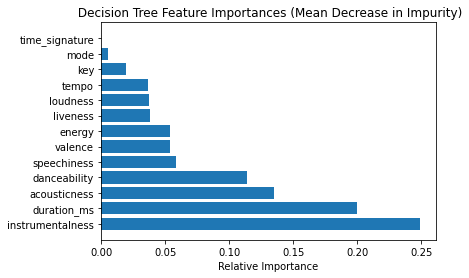

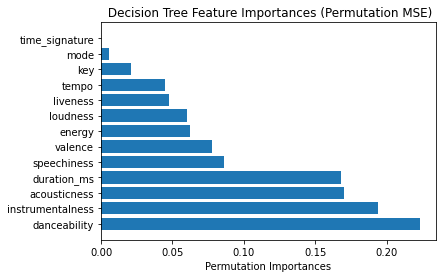

In [20]:
DTC=DecisionTreeClassifier()
DTC.fit(Xtrain_norm_select, Ytrain)

#decision tree features importance
features=feature_importance(DTC, "Decision Tree", Xtest_norm_select)

A decision tree can be used for classifications tasks. The principle is to separate progressively a set of training data using a top-down approach known as the CART (Classification And Regression Trees) algorithm. Using first the whole dataset, the algorithm creates two subsets using 1 feature k and a threshold tk . The (k,tk) pair is the one that generates the purest
subsets (weighted by their size).

Decision trees enjoy the advantage of following a set of simple rules, resulting in a fast inference. It also easy to apprehend why the model made a prediction, thanks to its visualization characteristics. On the downside, they are prone to overfitting and a selection bias towards
covariates with many possible splits.

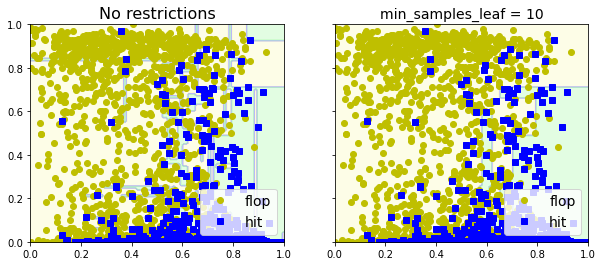

In [21]:
#choose most important features to perform parameters comparison
X_comp=Xtrain_norm_select[['danceability','instrumentalness']].to_numpy()

#decision tree parameters comparison
DTC_compare_optim_1=DecisionTreeClassifier(random_state=42)
DTC_compare_optim_1.fit(X_comp,Ytrain)
DTC_compare_optim_2=DecisionTreeClassifier(min_samples_leaf=10, random_state=42)
DTC_compare_optim_2.fit(X_comp,Ytrain)


fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(DTC_compare_optim_1, X_comp, Ytrain, axes=[0, 1, 0, 1])
plt.title("No restrictions", fontsize=16)
plt.sca(axes[1])
plot_decision_boundary(DTC_compare_optim_2, X_comp, Ytrain, axes=[0, 1, 0, 1])
plt.title("min_samples_leaf = {}".format(DTC_compare_optim_2.min_samples_leaf), fontsize=14)
plt.ylabel("")
plt.show()

After trying several values, the better separation seems to be made when the min sample leaf is close to 10.

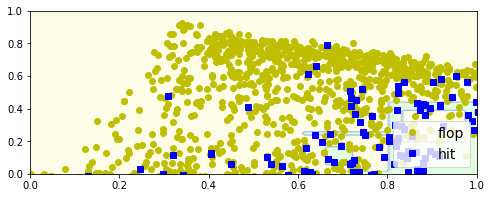

In [22]:
#decision tree sensibility to training rotation
angle = np.pi / 180 * 20
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
Xr = X_comp.dot(rotation_matrix)

DTC_Optim_r = DecisionTreeClassifier(min_samples_leaf=7,random_state=42)
DTC_Optim_r.fit(Xr, Ytrain)
plt.figure(figsize=(8, 3))
plot_decision_boundary(DTC_Optim_r, Xr, Ytrain, axes=[0, 1, 0, 1])
plt.show()

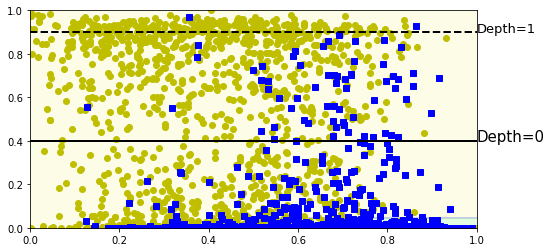

In [23]:
#decision tree sensitivity to training set details
X_comp[(X_comp[:, 1]==X_comp[:, 1][Ytrain==1].max()) & (Ytrain==1)] # widest liveness value
not_widest_energy = (X_comp[:, 1]!=0.998) 
X_tweaked = X_comp[not_widest_energy]
y_tweaked = Ytrain[not_widest_energy]

DTC_optim_tweaked = DecisionTreeClassifier(max_depth=2, random_state=40)
DTC_optim_tweaked.fit(X_tweaked, y_tweaked)
plt.figure(figsize=(8, 4))
plot_decision_boundary(DTC_optim_tweaked, X_tweaked, y_tweaked, legend=False)
plt.plot([0, 1], [0.4, 0.4], "k-", linewidth=2)
plt.plot([0, 1], [0.9, 0.9], "k--", linewidth=2)
plt.text(1.0, 0.4, "Depth=0", fontsize=15)
plt.text(1.0, 0.9, "Depth=1", fontsize=13)
plt.show()

{'max_depth': 10, 'min_samples_leaf': 19, 'min_samples_split': 2}


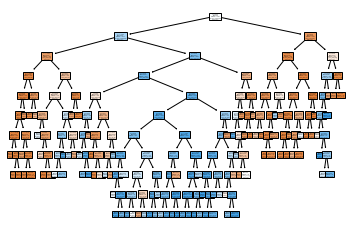

In [24]:
#Grid search for depth and leaf
param_grid = {'max_depth': np.arange(5,15), 'min_samples_leaf' : np.arange(8,20), 'min_samples_split' : np.arange(2,4)}
grid_search = GridSearchCV(DTC, param_grid, cv=5, scoring='roc_auc')
x = grid_search.fit(Xtrain_norm_select, Ytrain)
param_optim=x.best_params_
DTC_optim=x.best_estimator_
DTC_optim.fit(Xtrain_norm_select,Ytrain)
fig = tree.plot_tree(DTC_optim, 
                   feature_names=Xtrain_norm_select.index,  
                   class_names=["hit","flop"],
                   filled=True)
print(param_optim)

The  min_samples_leaf and min_samples_split are used to control overfitting and may have the effect of smoothing the model.
min_samples_leaf defines the number of elements for each leaf and min_samples_split the minimum number of samples required to split an internal node. The max_depth allows you to choose how deep you want your tree to grow. Those three parameters are the most important to tune.

The hyperparameter tuning is highlighting that a max_depth superior to 10, min_samples_leaf superior to 19, and min_samples_split superior to 2 will certainly conduct to an overfitting of the model. 

## 6. Unsupervised Models

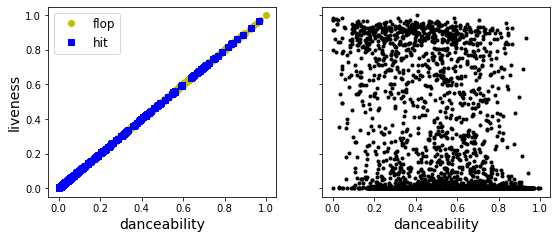

In [25]:
#classification vs clustering
plt.figure(figsize=(9, 3.5))

plt.subplot(121)
plt.plot(X_comp[Ytrain==0, 0], X_comp[Ytrain==0, 0], "yo", label="flop")
plt.plot(X_comp[Ytrain==1, 1], X_comp[Ytrain==1, 1], "bs", label="hit")
plt.xlabel("danceability", fontsize=14)
plt.ylabel("instrumentalness", fontsize=14)
plt.legend(fontsize=12)

plt.subplot(122)
plt.scatter(X_comp[:, 0], X_comp[:, 1], c="k", marker=".")
plt.xlabel("danceability", fontsize=14)
plt.tick_params(labelleft=False)

### 6.1. K-mean Clustering

In [26]:
#Kmean_Optim
import warnings
warnings.filterwarnings("ignore")

Kmean = KMeans()

param_grid = {"n_clusters": np.array([2,10]),
             "init":["k-means++"],
             "algorithm":["elkan"],
             "random_state":np.array([10,20])}

grid_search = GridSearchCV(Kmean, param_grid, cv=5, scoring='roc_auc', verbose=True)
x_train = grid_search.fit(Xtrain_norm_select)
x_train.cv_results_
param_optim=x_train.best_params_
Kmean_Optim_train = x_train.best_estimator_
Kmean_Optim_train.fit(Xtrain_norm_select)

x_test = grid_search.fit(Xtest_norm_select)
x_test.cv_results_
param_optim_2=x_test.best_params_
Kmean_Optim_test = x_test.best_estimator_
Kmean_Optim_test.fit(Xtest_norm_select)
print(param_optim)

score = accuracy_score(Ytest,Kmean_Optim_test.predict(Xtest_norm_select))
print('Accuracy:{0:f}'.format(score))

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Fitting 5 folds for each of 4 candidates, totalling 20 fits
{'algorithm': 'elkan', 'init': 'k-means++', 'n_clusters': 2, 'random_state': 10}
Accuracy:0.471014


The number of clusters allow to define the number of clusters centers that we expect to have. Init allows to set the initial cluster centroid. Random state is useful to reproduce exact clusters over and over again. The "elkan" algorithm can be more efficient on some datasets with well-defined clusters and should be selected by the gridsearch. 

According to the tests conducted, the algorithm should be set to elkan between "lloyd", "elkan", "auto" and "full". 

The init should be set to k-means++ between "k-means++" and "random".

As we are in a binary classification problem, the number of clusters should be 2.

The random state should be set around 10.

Due to the difference between classification and clustering, it is normal to get a poor accuracy despite the gridsearch.

In [27]:
#Create confusion matrix for train set
# Unscale the predictions
scaler = StandardScaler()
df_train = pd.DataFrame(Xtrain_norm_select, columns=['x', 'y'])
df_train['pred_label'] = Kmean_Optim_train.labels_
df_train['true_label'] = Ytrain

# correctly and falsely classified values
df_eval = df_train.copy()
df_eval['true_label'] = df_eval['true_label'].map({0:0, 1:1})
df_eval['pred_label'] = df_eval['pred_label'].map({0:1, 1:0})
df_eval.loc[df_eval['pred_label'] == df_eval['true_label'], 'Correctly classified?'] = 'True' 
df_eval.loc[df_eval['pred_label'] != df_eval['true_label'], 'Correctly classified?'] = 'False'

# Create a confusion matrix
def evaluate_results(model, y_true, y_pred):
    tick_marks = [0.5, 1.5, 2.5]
    
    # Print the Confusion Matrix
    matrix = confusion_matrix(y_true,  y_pred)
    return matrix

y_true_train = df_eval['true_label']
y_pred_train = df_eval['pred_label']

cm_kmeans_train=evaluate_results(Kmean_Optim_train, y_true_train, y_pred_train)


In order to compare Kmeans to classifiers, it is necessary to manually create the classification and confusion matrix associated to this algorithm for the train set.

In [28]:
#Create confusion matrix for test set
# Unscale the predictions
scaler = StandardScaler()
df_test = pd.DataFrame(Xtest_norm_select, columns=['x', 'y'])
df_test['pred_label'] = Kmean_Optim_test.labels_
df_test['true_label'] = Ytest

# correctly and falsely classified values
df_eval = df_test.copy()
df_eval['true_label'] = df_eval['true_label'].map({0:0, 1:1})
df_eval['pred_label'] = df_eval['pred_label'].map({0:1, 1:0})
df_eval.loc[df_eval['pred_label'] == df_eval['true_label'], 'Correctly classified?'] = 'True' 
df_eval.loc[df_eval['pred_label'] != df_eval['true_label'], 'Correctly classified?'] = 'False'

# Create a confusion matrix
def evaluate_results(model, y_true, y_pred):
    tick_marks = [0.5, 1.5, 2.5]
    
    # Print the Confusion Matrix
    matrix = confusion_matrix(y_true,  y_pred)
    return matrix

y_true_test = df_eval['true_label']
y_pred_test = df_eval['pred_label']

cm_kmeans_test=evaluate_results(Kmean_Optim_test, y_true_test, y_pred_test)


In order to compare Kmeans to classifiers, it is necessary to manually create the classification and confusion matrix associated to this algorithm for the test set.

### 6.2. DBScan Clustering

In [29]:
import warnings
warnings.filterwarnings("ignore")


#DBScan = DBSCAN()

#param_grid = {"eps": np.array([0.2,5]),
#             "min_samples":np.array([2,10])}

#grid_search = GridSearchCV(DBScan, param_grid, cv=5, scoring='roc_auc', verbose=True)
#x = grid_search.fit(Xtrain_norm)
#x.cv_results_
#param_optim=x.best_params_
#DBScan_Optim= x.best_estimator_
#DBScan_Optim.fit(Xtrain_norm)
#print(DBScan_Optim.core_sample_indices_)
KNN_optim= KNeighborsClassifier(n_neighbors=10)
#KNN_optim.fit(DBScan_Optim.components_, DBScan_Optim.labels_[DBScan_Optim.core_sample_indices_])
KNN_optim.fit(Xtrain_norm_select,Ytrain)
print(KNN_optim.get_params())


{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 10, 'p': 2, 'weights': 'uniform'}


Because we are in a classification problem, the KNN cannot be fitted using DBScan components, labels and core sample indices. The KNeighborsClassifier should be directly called on the train set. 

The only hyperparameter to care about in order to increase the accuracy is the number of neighbors selected.  In order to get the best accuracy on the test set, the number of neighbors should be close to 10. 

## 7. Supervised Models

### 7.1. Optim Random Forest

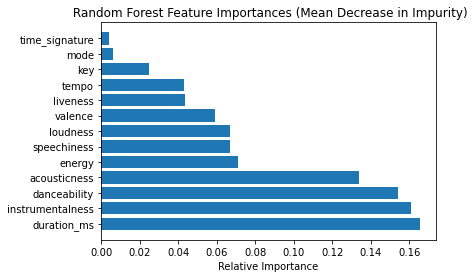

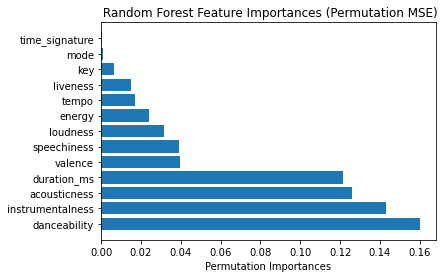

{'max_depth': 40, 'n_estimators': 40}


In [30]:
RFC=RandomForestClassifier()
#Grid search for number of trees and number of splits
param_grid = {'n_estimators' : np.arange(0,50,10),
              'max_depth': np.arange(0,50,10)
             }
grid_search = GridSearchCV(RFC, param_grid, cv=5, scoring='roc_auc', n_jobs=8)
x = grid_search.fit(Xtrain_norm_select, Ytrain)
param_optim=x.best_params_
RFC_optim=x.best_estimator_
RFC_optim.fit(Xtrain_norm_select,Ytrain)
features=feature_importance(RFC_optim, "Random Forest", Xtest_norm_select)
print(param_optim)

Random forests are usually robust to overfitting, since each forest is only presented with a
subset of all the available features. The most important parameters to be determined are the number of trees that should be in the forest and the number of features considered for splitting at each leaf node, because they give the principal architecture of the forest. 

In order not to be affected by underfitting and overfitting, the max_depth should be around 40 and number of estimators around 40. 

### 7.2. Optimal SVM

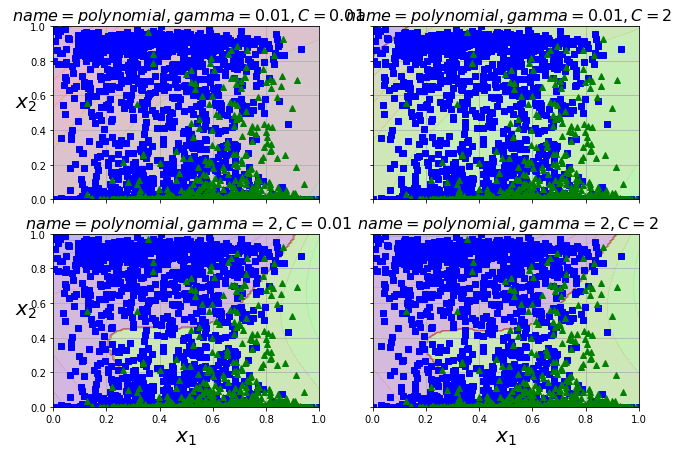

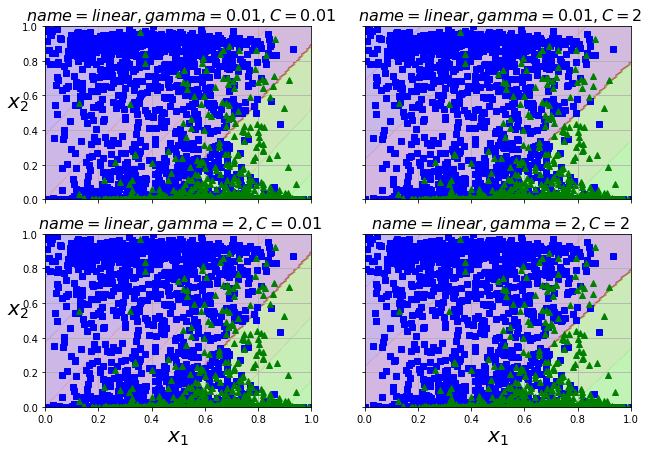

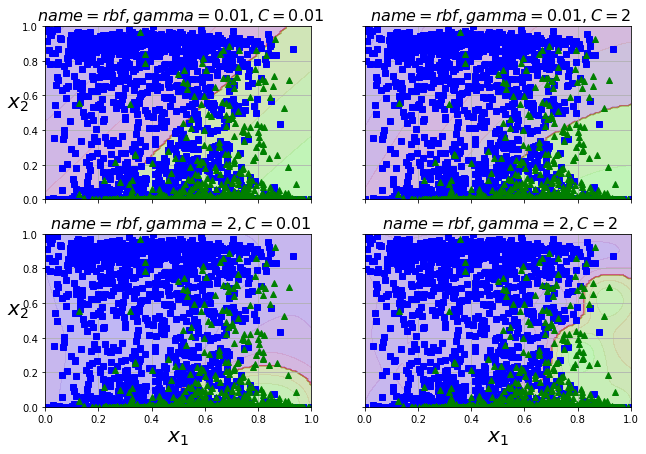

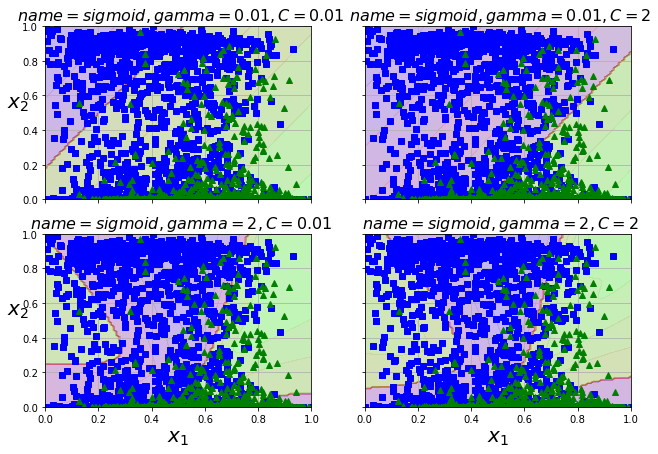

In [31]:
#observation for gamma and c
X_comp=Xtrain_norm_select[['danceability','instrumentalness']].to_numpy()

svm_linear = [] 
svm_poly=[]
svm_rbf=[]
svm_sigmoid=[]

gamma1, gamma2 = 0.01, 2
C1, C2 = 0.01, 2
hyperparams = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2)

for gamma, C in hyperparams:

    kernel_svm_poly = Pipeline([
            ("scaler", StandardScaler()),
            ("svm_clf", SVC(kernel="poly", gamma=gamma, C=C))
        ])
    kernel_svm_linear = Pipeline([
            ("scaler", StandardScaler()),
            ("svm_clf", SVC(kernel="linear", gamma=gamma, C=C))
        ])

    kernel_svm_rbf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="rbf", gamma=gamma, C=C))
        ])
    kernel_svm_sigmoid = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="sigmoid", gamma=gamma, C=C))
        ])
        
    kernel_svm_poly.fit(X_comp, Ytrain)
    kernel_svm_linear.fit(X_comp, Ytrain)
    kernel_svm_rbf.fit(X_comp,Ytrain)
    kernel_svm_sigmoid.fit(X_comp, Ytrain)
    
    svm_poly.append(kernel_svm_poly)
    svm_linear.append(kernel_svm_linear)
    svm_rbf.append(kernel_svm_rbf)
    svm_sigmoid.append(kernel_svm_sigmoid)

#observe variation of C and gamma
def plot_hyperparameters_impact(svm_kernel, kernel_name):
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10.5, 7), sharex=True, sharey=True)
    for i, svm in enumerate(svm_kernel):
        plt.sca(axes[i // 2, i % 2])
        plot_predictions(svm, [0.0, 1.0, 0.0 , 1.0])
        plot_dataset(X_comp, Ytrain, [0.0, 1.0, 0.0 , 1.0])
        gamma, C = hyperparams[i]
        plt.title(r"$\ name={}, gamma = {}, C = {}$".format(kernel_name,gamma, C), fontsize=16)
        if i in (0, 1):
            plt.xlabel("")
        if i in (1, 3):
            plt.ylabel("")
    plt.show()

fig1=plot_hyperparameters_impact(svm_poly,"polynomial")
fig2=plot_hyperparameters_impact(svm_linear,"linear")
fig3=plot_hyperparameters_impact(svm_rbf,"rbf")
fig4=plot_hyperparameters_impact(svm_sigmoid,"sigmoid")

SVM reduce the possibility of overfitting and alleviate the need of tedious cross-validation for
the purpose of appropriate hyper-parameter selection. The main drawbacks of SVMs stem
from the fact that they constitute black-box models, thus limiting their potential of offering
deeper intuition and visualization of the obtained results and inference procedure.

The kernel parameter selects the type of hyperplane used to separate the data.

Gamma is a parameter for non linear hyperplanes. Increasing  gamma  makes the bell-shape curve narrower, and as a result each instance’s range of influence is smaller: the decision boundary ends up being more irregular, wiggling around individual instances.
Conversely, a small  gamma value makes the bell-shaped curve wider, so instances have a larger range of influence, and the decision boundary ends up smoother.
So  gamma acts like a regularization hyperparameter: if your model is overfitting, you should reduce it, and if it is underfitting, you should increase it (similar to the  C  hyperparameter). 

C is the penalty parameter of the error term. It controls the trade off between smooth decision boundary and classifying the training points correctly.

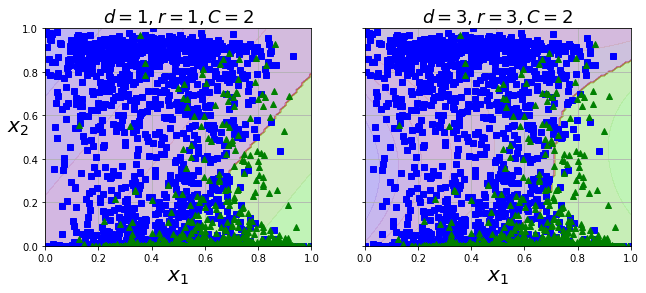

In [32]:
#observe variation of r and d (complexity)

# Kernilized SVM with polynomial, d=1 and r=1. The hyperparameter C is set to 2.
poly_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=1, coef0=1, C=2))
    ])
poly_kernel_svm_clf.fit(X_comp, Ytrain)

# Kernlized SVM with polynomial, d=3 and r=3 (higher complexity). The hyperparameter C is set to 2.
poly100_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=3, coef0=3, C=2))
    ])
poly100_kernel_svm_clf.fit(X_comp, Ytrain)

#observe variation of r and d (complexity)
fig5, axes = plt.subplots(ncols=2, figsize=(10.5, 4), sharey=True)

plt.sca(axes[0])
plot_predictions(poly_kernel_svm_clf,[0.0, 1.0, 0.0 , 1.0])
plot_dataset(X_comp, Ytrain, [0.0, 1.0, 0.0 , 1.0])
plt.title(r"$d=1, r=1, C=2$", fontsize=18)

plt.sca(axes[1])
plot_predictions(poly100_kernel_svm_clf, [0.0, 1.0, 0.0 , 1.0])
plot_dataset(X_comp, Ytrain, [0.0, 1.0, 0.0 , 1.0])
plt.title(r"$d=3, r=3, C=2$", fontsize=18)
plt.ylabel("")
plt.show()

The higher the polynomial degree, the higher model complexity, and the more the overfitting of the training set. 

In [33]:
#Grid search for optimal kernel, c and gamma
param_grid = {'kernel': ['linear','poly','sigmoid','rbf'],
              'C': [0.01, 2],
               'gamma': [0.01, 2]}
              
grid_search = GridSearchCV(SVC(probability=True),\
                           param_grid,refit = True, cv=5, verbose=2)
x = grid_search.fit(Xtrain_norm_select, Ytrain)
x.cv_results_
param_optim=x.best_params_
SVC_optim = x.best_estimator_
SVC_optim.fit(Xtrain_norm_select, Ytrain)
print(param_optim)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END ..................C=0.01, gamma=0.01, kernel=linear; total time=   2.1s
[CV] END ..................C=0.01, gamma=0.01, kernel=linear; total time=   2.0s
[CV] END ..................C=0.01, gamma=0.01, kernel=linear; total time=   2.0s
[CV] END ..................C=0.01, gamma=0.01, kernel=linear; total time=   2.0s
[CV] END ..................C=0.01, gamma=0.01, kernel=linear; total time=   2.0s
[CV] END ....................C=0.01, gamma=0.01, kernel=poly; total time=   2.8s
[CV] END ....................C=0.01, gamma=0.01, kernel=poly; total time=   2.9s
[CV] END ....................C=0.01, gamma=0.01, kernel=poly; total time=   2.8s
[CV] END ....................C=0.01, gamma=0.01, kernel=poly; total time=   2.8s
[CV] END ....................C=0.01, gamma=0.01, kernel=poly; total time=   3.0s
[CV] END .................C=0.01, gamma=0.01, kernel=sigmoid; total time=   3.8s
[CV] END .................C=0.01, gamma=0.01, ke

The best kernel for this classification problem is the polynomial one. After trying several values, the degree of complexity and high vs low-degree polynomials influence should be set to 3.

C and gamma should be set to 2. If we take values above 2, the computation takes too long and crashes. 

## 8. Neural Networks

### 8.1. Deep Neural Network

In [34]:
#Function to generate DNN model 


def get_clf(meta, hidden_layer_sizes, dropout,activation,initializer):
    n_features_in_ = meta["n_features_in_"]
    n_classes_ = meta["n_classes_"]
    model = keras.models.Sequential()
    model.add(keras.layers.Input(shape=(n_features_in_,)))
    for hidden_layer_size in hidden_layer_sizes:
        model.add(keras.layers.Dense(hidden_layer_size, activation=activation,kernel_initializer=initializer))
        model.add(keras.layers.Dropout(dropout))
    model.add(keras.layers.Dense(1, activation=activation))
    return model

params = {
    'optimizer':['adam'],
    'optimizer__learning_rate': [0.01],
    'model__hidden_layer_sizes': [(50, ),(100,)],
    'model__dropout': [0.01],
    'batch_size':np.array([10]),
    'epochs':np.array([10]),
    'activation':["sigmoid"],
    'initializer':['he_normal']}

clf = KerasClassifier(
    model=get_clf,
    loss="binary_crossentropy",
    optimizer=params['optimizer'],
    optimizer__learning_rate=['optimizer__learning_rate'],
    activation=params['activation'],
    initializer=params['initializer'],
    model__hidden_layer_sizes=params['model__hidden_layer_sizes'],
    model__dropout=['model__dropout'],
    metrics=['accuracy'],
    verbose=True,
)




grid_search = GridSearchCV(clf, params, scoring='accuracy', verbose=True)
x = grid_search.fit(Xtrain_norm_select, Ytrain)
x.cv_results_
param_optim=x.best_params_
neural_net_optim = x.best_estimator_
neural_net_optim.fit(Xtrain_norm_select, Ytrain)
print(param_optim)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
Epoch 1/10
354/354 [==============================] - 1s 1ms/step - loss: 0.5271 - accuracy: 0.7203
Epoch 2/10
354/354 [==============================] - 0s 1ms/step - loss: 0.4599 - accuracy: 0.7769
Epoch 3/10
354/354 [==============================] - 0s 1ms/step - loss: 0.4520 - accuracy: 0.7877
Epoch 4/10
354/354 [==============================] - 0s 1ms/step - loss: 0.4467 - accuracy: 0.7913
Epoch 5/10
354/354 [==============================] - 0s 1ms/step - loss: 0.4405 - accuracy: 0.7936
Epoch 6/10
354/354 [==============================] - 0s 1ms/step - loss: 0.4370 - accuracy: 0.8001
Epoch 7/10
354/354 [==============================] - 0s 1ms/step - loss: 0.4333 - accuracy: 0.7998
Epoch 8/10
354/354 [==============================] - 0s 1ms/step - loss: 0.4292 - accuracy: 0.8075
Epoch 9/10
354/354 [==============================] - 0s 1ms/step - loss: 0.4269 - accuracy: 0.8058
Epoch 10/10
89/89 [=====================

In a deep neural network, layers are stacked. A neural network with one hidden layer is a universal approximator. With enough hidden units, it can approximate any transform. The role of adding layers is to learn more complicated functions with fewer hidden units. Neural nets have lots of parameters, so they need many samples to train them, otherwise they overfit.

The number of neurons in a layer (model__hidden_layer_sizes) is probably the most important parameter to tune. Generally the number of neurons in a layer controls the representational capacity of the network. A larger network requires more training and at least the batch size and number of epochs should ideally be optimized with the number of neurons. Its value should be around 100.

The optimizer defines the algorithm optimization function. After comparing between "SGD", "RMSprop", "Adagrad", "Adadelta", "Adam", "Adamax" and "Nadam", the gridsearch is pointing that Adam is the best.

The learning rate controls how much to update the weight at the end of each batch. It can take values between 0 and 0.99, and should be set to 0.01.

Tuning the dropout rate for regularization helps to limit overfitting and improve the model’s ability to generalize. It can take values between 0 and 0.99, and should be set to 0.01. 

The batch size in iterative gradient descent is the number of patterns shown to the network before the weights are updated. It is also an optimization in the training of the network, defining how many patterns to read at a time and keep in memory. It should be set to 10.

The number of epochs is the number of times that the entire training dataset is shown to the network during training. It should be set to 10.

The activation function controls the non-linearity of individual neurons and when to fire. Generally, the rectifier activation function is the most popular, but it used to be the sigmoid and the tanh functions and these functions may still be more suitable for different problems. After comparing between "softmax", "softplus", "softsign", "relu", "tanh", "sigmoid", "hard_sigmoid" and "linear", the gridsearch is pointing that sigmoid is the best.

The neightwork weight initialization is based on small random values. Ideally, it may be better to use different weight initialization schemes according to the activation function used on each layer.  After comparing between "he_normal", "uniform", "lecun_uniform", "normal","zero", "glorot_normal", "glorot_uniform" and "he_uniform", the gridsearch is pointing that he_normal is the best.

### 8.2.  MLP Neural Network

In [35]:
#Initializing the Recurrent Neural Network
neural_net = MLPClassifier(alpha=1e-5, random_state=1,max_iter=500)
#Grid search for number of hidden layers and number of units
param_grid = {'hidden_layer_sizes': [(random.randint(1, 10), random.randint(1, 10)) for i in range(0, 10)],
              'activation': ["identity"],
              'solver':['adam']} #lbfgs does not converge
grid_search = GridSearchCV(estimator=neural_net, param_grid=param_grid, cv=5,\
                           verbose=True)
x = grid_search.fit(Xtrain, Ytrain)
x.cv_results_
param_optim=x.best_params_
deep_neural_net_optim = x.best_estimator_
deep_neural_net_optim.fit(Xtrain_norm_select, Ytrain)
print(param_optim)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'activation': 'identity', 'hidden_layer_sizes': (2, 7), 'solver': 'adam'}


A feedforward artificial neural network called a multilayer perceptron (MLP) is a type of
feedforward artificial neural network (ANN).

The max_iter should be set to 500 in order to reach a convergence.

The hidden_layer_sizes allows to choose the number of neurons in the hidden layers. It is the most important parameter of the MLP, as it shapes the layers. The two layers should be respectively set to 2 and 7.

The activation parameter relates to the activation function chosen for the hidden layer. After comparing between "identity", "logistic", "tanh" and "relu", the gridsearch is pointing that identity is the best.

The solver is the weight optimization function chosen. The default solver "adam" works pretty well on relatively large datasets (with thousands of training samples or more) in terms of both training time and validation score.. After comparing between "adam" and "sgd", the gridsearch is thus pointing that adam is the best.

### 8.3. XGBoost

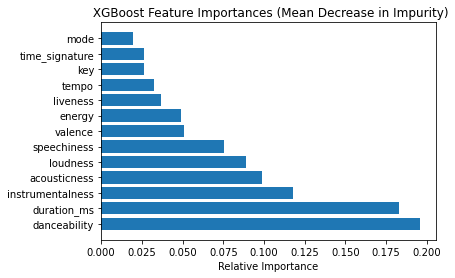

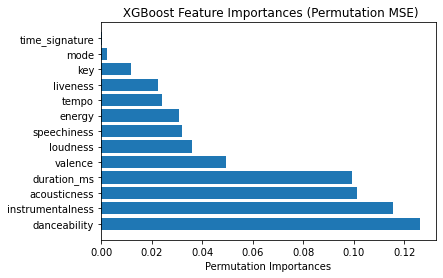

{'colsample_bynode': 0.30000000000000004, 'colsample_bytree': 0.7000000000000001, 'max_depth': 5, 'min_child_weight': 1}


In [36]:
#Deprecated functions warning desactivated by using use_label_encoder=False
import warnings
warnings.filterwarnings("ignore")
XGb = xgb.XGBClassifier(objective='binary:logistic',eval_metric="error", use_label_encoder =False)

#Grid search for maximum depth of generated tree, minium leaf node size,
#subsampling for building classification trees, subsampling for variable considered in each split
param_grid = {
    'max_depth': np.arange(4,6),
    'min_child_weight':np.arange(1,3),
    'colsample_bytree': np.arange(0.1,1,0.2),
    'colsample_bynode': np.arange(0.1,1,0.2)
}
grid_search = GridSearchCV(XGb, param_grid, cv=5, scoring='roc_auc')
x = grid_search.fit(Xtrain_norm, Ytrain, eval_metric="auc",\
                    eval_set=[(Xtest_norm, Ytest)], early_stopping_rounds=2,verbose=False)
x.cv_results_
param_optim=x.best_params_
XGb_optim = x.best_estimator_
XGb_optim.fit(Xtrain_norm_select, Ytrain)
features=feature_importance(XGb_optim, "XGBoost", Xtest_norm_select)
print(param_optim)

When a decision tree is the weak learner, the resulting algorithm is called gradient-boosted trees. It usually outperforms random forest. Gradient boosting is an algorithm whose principle is to combine the results of a set of simpler and weaker models to provide a better prediction. The idea is simple: instead of using a single model, the algorithm will use several models which will then be combined to obtain a single result.

Because we are in a binary classification problem, the objective function is directly set to binary:logistic and the eval_metric to error.

The parameter max_depth is the depth chosen for the tree. A deeper tree might increase the performance, but also the complexity and chances to overfit. Here, the best value is 5.

The min_child_weight is the mininimum sum of instance weight needed in a child. Here, It should be 1.

colsample_bytree represents the fraction of columns to be randomly sampled for each tree. It might improve overfitting.
The value must be between 0 and 1. It should be set to 0.7.

colsample_bynode is the subsample ratio of columns for each node (split). Subsampling occurs once every time a new split is evaluated. Columns are subsampled from the set of columns chosen for the current level. The value must be between 0 and 1. It should be set to 0.3.

## 9. Performance Comparison

### 9.1. Evaluation Steps

In [37]:
def evaluation(X_Actual, Y_actual, classifier, classifier_name):
    Y_predicted = classifier.predict(X_Actual)
    
    
    if (classifier==Kmean_Optim_train) & (len(X_Actual)==len(Xtrain_norm_select)) : 
        cm=cm_kmeans_train
        Y_actual=y_true_train
        Yscores=y_pred_train
        fpr, tpr, thresholds = roc_curve(Y_actual, Yscores)
        
    elif (classifier==Kmean_Optim_train) & (len(X_Actual)==len(Xtest_norm_select)):
        cm=cm_kmeans_test
        Y_actual=y_true_test
        Yscores=y_pred_test
        fpr, tpr, thresholds = roc_curve(Y_actual, Yscores)   

        
    else:
        cm = confusion_matrix(Y_actual, Y_predicted)
        ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=classifier.classes_).plot()
        plt.title(classifier_name)

        #5 fold cross validation
        x = cross_val_score(classifier, X_Actual, Y_actual, cv=5)
        print("cross validation score:", x, "\n")
        Yscores = cross_val_predict(classifier, X_Actual, Y_actual, cv=5,\
                                    method="predict_proba")
        Yscores=Yscores[:,-1]

        #ROC curve metrics
        fpr, tpr, thresholds = roc_curve(Y_actual, Yscores)
    
    
    #Metrics
    tn, fp, fn, tp = cm.ravel()
    sensitivity=tp/(tp+fn)
    fpr_cm=fp/(fp+tn)
    specificity=tn/(tn+fp)
    G=math.sqrt(sensitivity*specificity)
    LP=sensitivity/(1-specificity)
    LR=(1-sensitivity)/specificity
    #Avoid math error with log(0)
    if sensitivity==0 or specificity==0:
        DP=float('inf')
    else:
        DP=(math.sqrt(3)/math.pi)*(math.log(sensitivity/(1-sensitivity))+math.log(specificity/(1-specificity)))
    gamma=sensitivity-(1-sensitivity)
    BA=(1/2)*(sensitivity+specificity)
    WBA=(3/4)*(sensitivity)+(1/4)*specificity
    index_metrics = ["False Alarm","Hit Rate","Precision","Accuracy","Recall", \
                "AUC","Kolmogorov–Smirnov","G-mean","Positive Likelihood Ratio",\
                  "Negative Likelihood Ratio","Discriminant Power", "Youden Index",\
                      "Balanced Accuracy", "Weighted Balance Accuracy"]
    d = {classifier_name: [fpr_cm, sensitivity, precision_score(Y_actual, Y_predicted)\
                           ,accuracy_score(Y_actual, Y_predicted),\
                               recall_score(Y_actual, Y_predicted),\
                                   roc_auc_score(Y_actual, Yscores),\
                           stats.ks_2samp(Y_actual, Yscores)[0],G,LP,\
                               LR,DP,gamma,BA,WBA]}
    df_metrics=pd.DataFrame(d, index_metrics)
    return fpr, tpr, classifier_name, df_metrics

For each instance i, the model has to return the estimated probability p that the track is a hit.

The scores computed are obtained using the train dataset. There is no guarantee however that these scores will be the same on the test dataset and
in real conditions. In order not to use the test set at this stage and explore alternatives, the k-
fold cross validation technique can be useful. In k-fold cross-validation, the training set is (randomly) split into k smaller sets. Then the following procedure is applied for each of the k folds. The model is trained using k 1 of the folds as training data. Then the resulting model is validated on the remaining part of the data, used as a pre test set to compute performance score. 5 folds are used in this case.

### 9.2. Evaluation per model

cross validation score: [0.81900452 0.80294451 0.80294451 0.80520951 0.79728199] 

cross validation score: [0.78280543 0.7239819  0.77375566 0.58371041 0.74545455] 

cross validation score: [0.81900452 0.80294451 0.80294451 0.80520951 0.79728199] 

cross validation score: [0.78280543 0.7239819  0.77375566 0.58371041 0.74545455] 

cross validation score: [0.82013575 0.79161948 0.80860702 0.81540204 0.78708947] 

cross validation score: [0.81447964 0.77375566 0.78733032 0.80995475 0.75909091] 

cross validation score: [0.83257919 0.80407701 0.8403171  0.82219706 0.80747452] 

cross validation score: [0.75113122 0.78733032 0.7918552  0.84162896 0.77727273] 

cross validation score: [0.83144796 0.77463194 0.81200453 0.80520951 0.8006795 ] 

cross validation score: [0.75113122 0.77375566 0.76923077 0.80542986 0.73636364] 

cross validation score: [0.86312217 0.81993205 0.85503964 0.85277463 0.84937712] 

cross validation score: [0.81900452 0.79638009 0.81900452 0.83710407 0.8       ] 

cros

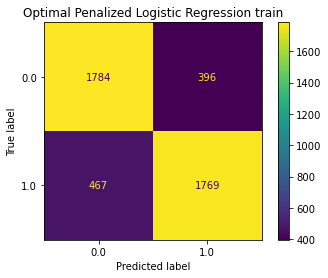

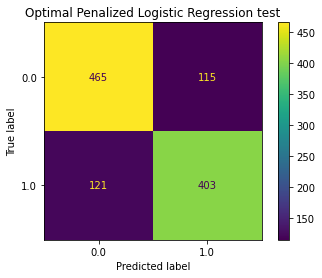

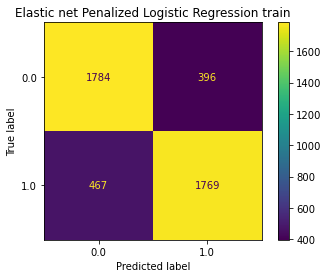

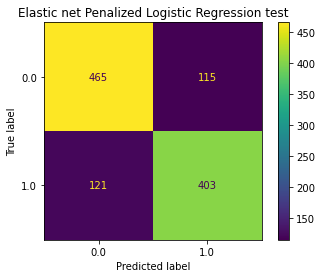

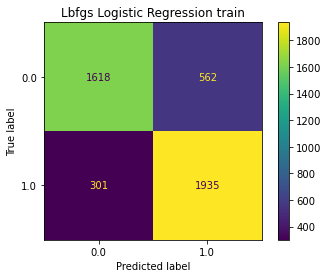

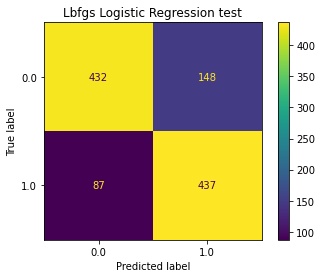

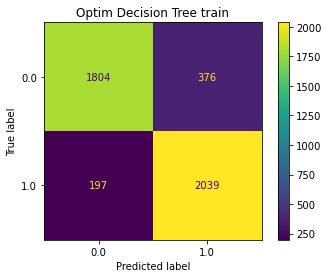

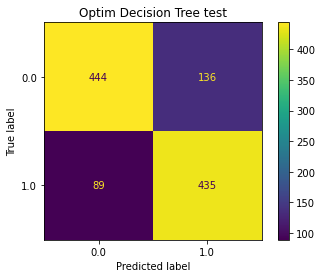

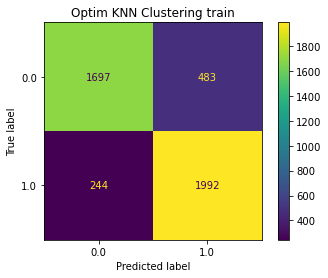

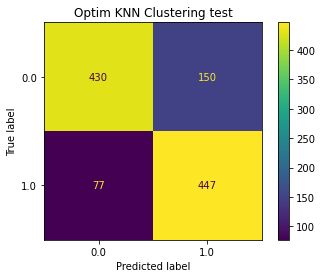

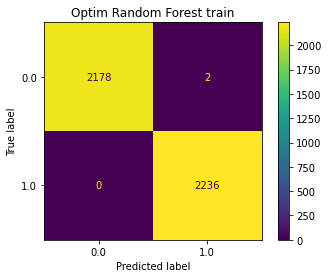

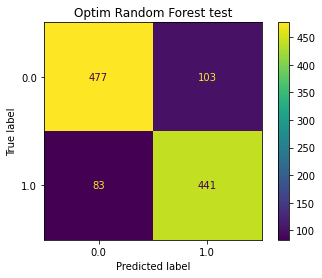

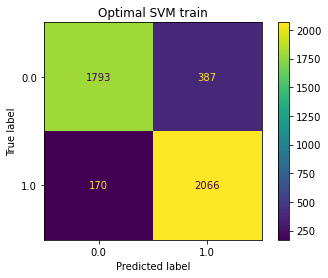

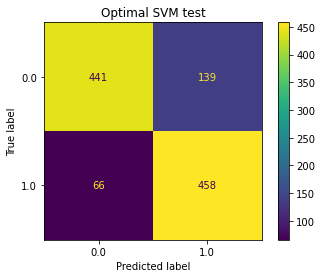

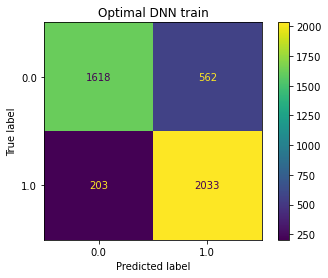

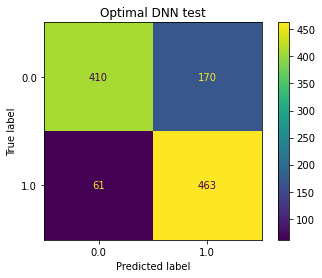

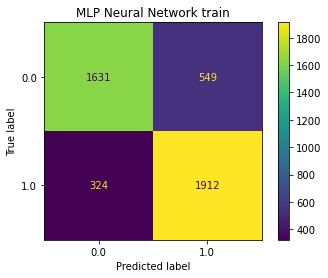

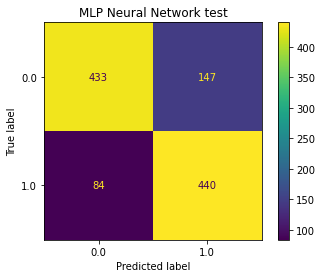

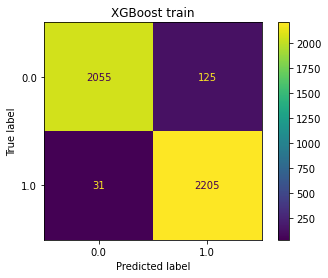

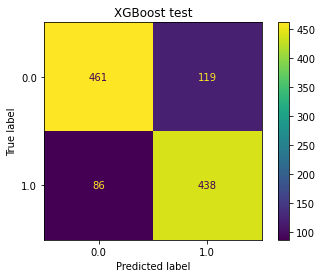

In [38]:
def train_test(algo,Xtrain_model,Xtest_model,Ytrain_model,Ytest_model,\
               train_name,test_name): 
    train_evaluation=evaluation(Xtrain_model, Ytrain_model, algo, train_name)
    test_evaluation=evaluation(Xtest_model, Ytest_model, algo,test_name)
    return train_evaluation, test_evaluation

#Algo List with selected train and test set
algo_1=train_test(sgd_clf_pen,Xtrain_norm_select,Xtest_norm_select,\
                  Ytrain,Ytest, "Optimal Penalized Logistic Regression train",\
                  "Optimal Penalized Logistic Regression test")
algo_2=train_test(sgd_clf_pen_optim,Xtrain_norm_select,Xtest_norm_select,\
                   Ytrain,Ytest, "Elastic net Penalized Logistic Regression train",\
                  "Elastic net Penalized Logistic Regression test")
algo_3=train_test(Log_clf,Xtrain_norm_select,Xtest_norm_select,\
                   Ytrain,Ytest,"Lbfgs Logistic Regression train" ,\
                  "Lbfgs Logistic Regression test" )
algo_4=train_test(DTC_optim,Xtrain_norm_select,Xtest_norm_select,\
                  Ytrain,Ytest,"Optim Decision Tree train", "Optim Decision Tree test")
algo_5=train_test(Kmean_Optim_train,Xtrain_norm_select,Xtest_norm_select,\
                  Ytrain,Ytest,"Optim K-mean Clustering train", "Optim K-mean Clustering test")
algo_6=train_test(KNN_optim,Xtrain_norm_select,Xtest_norm_select,\
                  Ytrain,Ytest,"Optim KNN Clustering train", "Optim KNN Clustering test") 
algo_7=train_test(RFC_optim,Xtrain_norm_select,Xtest_norm_select,\
                  Ytrain,Ytest,"Optim Random Forest train", "Optim Random Forest test")
algo_8=train_test(SVC_optim,Xtrain_norm_select,Xtest_norm_select,\
                   Ytrain,Ytest,"Optimal SVM train", "Optimal SVM test")
algo_9=train_test(neural_net_optim,Xtrain_norm_select,Xtest_norm_select,\
                   Ytrain,Ytest,"Optimal DNN train", "Optimal DNN test")
algo_10=train_test(deep_neural_net_optim,Xtrain_norm_select,Xtest_norm_select,\
                   Ytrain,Ytest,"MLP Neural Network train", "MLP Neural Network test")
algo_11=train_test(XGb_optim,Xtrain_norm_select,Xtest_norm_select,\
                   Ytrain,Ytest,"XGBoost train", "XGBoost test")

The accuracy score gives only a partial view of the classifier ability to identify hits and flops. To go further into the analysis, it is recommended to compute the confusion matrix of the predictions. The confusion matrix is a table with two rows and two columns (since we have 2 classes) that reports the number of true positives, true negatives, false positives and false negatives.

Based on the confusion matrix, it is possible to compute various scores that help understanding how the classifier behaves:

-Accuracy: fraction of correctly classified track

-Precision: fraction of correct predictions when the classifier identifies an instance as a hit 

-Recall (sensitivity/true positive rate): percentage of hits the classifier is able to identify

-F1 Score: harmonic mean of precision and recall

-Specificity: fraction of flops identified among all flops

-False Positive Rate: fraction of flops that are incorrectly classified as hits

### 9.3. ROC Curve Plot

In [39]:
def plot_roc_curve(fpr, tpr, color):
    plt.plot(fpr, tpr, color,  linewidth=2)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=12)
    plt.ylabel('True Positive Rate', fontsize=12)

The recall always decreases with the threshold whereas the evolution of the precision is non-monotonic. The Receiver Operating Characteristic (ROC) curve is a plot that displays the diagnostic ability of a binary classifier when the threshold is varied. It is created by plotting the true positive rate (TPR) or Recall against the
false positive rate (FPR). The ROC curve can also be thought of as a plot of the power (probability of detecting a true positive) against the Type I error (rejection of the fact that a song is a flop although it is). Very often the area under the ROC Curve or AUC is used to compare models and to select the best one (the one with the highest AUC).

### 9.4. Display ROC Curve and create metrics comparison dataframe

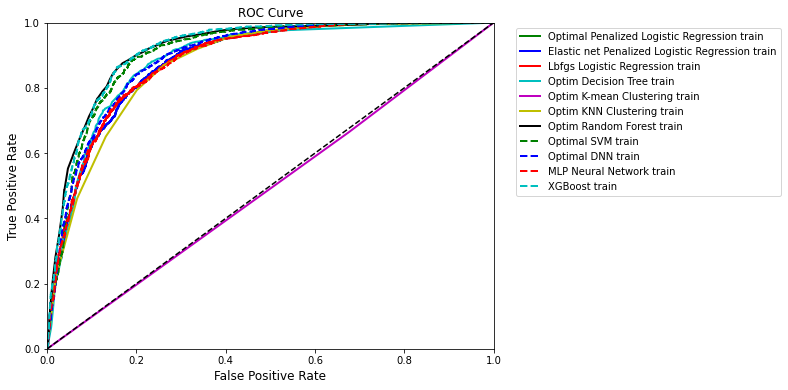

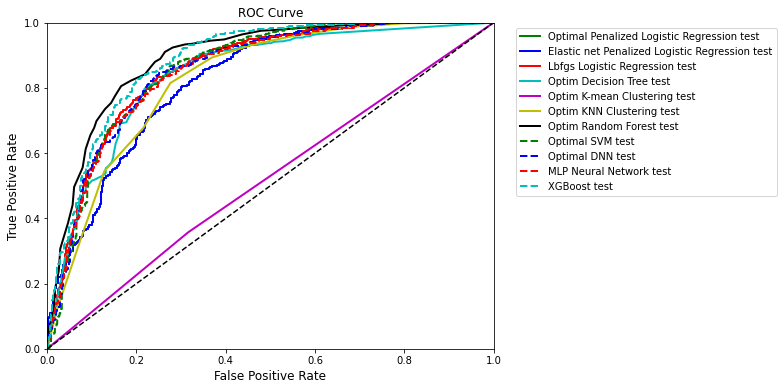

In [40]:
def metrics_total(model_1, model_2, model_3, model_4, model_5, model_6,model_7,model_8,model_9, model_10, model_11):
    #Dataframe metrics
    df_total_metrics = pd.concat([model_1[3], model_2[3], model_3[3],
                                 model_4[3], model_5[3], model_6[3],
                                 model_7[3],model_8[3],model_9[3],\
                                 model_10[3],model_11[3]], axis=1)
    #Comparative ROC Curve
    plt.figure(figsize=(8, 6))
    plot_roc_curve(model_1[0], model_1[1], 'g-')
    plot_roc_curve(model_2[0], model_2[1], 'b-')
    plot_roc_curve(model_3[0], model_3[1],'r-')
    plot_roc_curve(model_4[0], model_4[1],'c-')
    plot_roc_curve(model_5[0], model_5[1],'m-')
    plot_roc_curve(model_6[0], model_6[1],'y-')
    plot_roc_curve(model_7[0], model_7[1],'k-')
    plot_roc_curve(model_8[0], model_8[1],'g--')
    plot_roc_curve(model_9[0], model_9[1],'b--')
    plot_roc_curve(model_10[0], model_10[1],'r--')
    plot_roc_curve(model_11[0], model_11[1],'c--')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title("ROC Curve")
    plt.legend([model_1[2], model_2[2],model_3[2], model_4[2], model_5[2],\
                model_6[2], model_7[2],model_8[2],model_9[2],model_10[2],\
               model_11[2]],bbox_to_anchor=(1.04, 1))
    plt.show()
    return df_total_metrics

df_train_metrics=metrics_total(algo_1[0], algo_2[0],algo_3[0],algo_4[0],\
                               algo_5[0], algo_6[0],algo_7[0],algo_8[0],\
                                   algo_9[0],algo_10[0],algo_11[0])
df_test_metrics=metrics_total(algo_1[1], algo_2[1],algo_3[1],algo_4[1],\
                              algo_5[1],algo_6[1],algo_7[1],algo_8[1],\
                                   algo_9[1],algo_10[1],algo_11[1])


For this classification task, the Random Forest and XGBoost appear as the best predictors.

In [41]:
df_train_metrics

,Optimal Penalized Logistic Regression train,Elastic net Penalized Logistic Regression train,Lbfgs Logistic Regression train,Optim Decision Tree train,Optim K-mean Clustering train,Optim KNN Clustering train,Optim Random Forest train,Optimal SVM train,Optimal DNN train,MLP Neural Network train,XGBoost train
False Alarm,0.181651,0.181651,0.257798,0.172477,0.676606,0.221560,0.000917,0.177523,0.257798,0.251835,0.057339
Hit Rate,0.791145,0.791145,0.865385,0.911896,0.665027,0.890877,1.000000,0.923971,0.909213,0.855098,0.986136
Precision,0.817090,0.817090,0.774930,0.844306,0.515131,0.804848,0.999106,0.842234,0.783430,0.776920,0.946352
Accuracy,0.804574,0.804574,0.804574,0.870245,0.503623,0.835371,0.999547,0.873868,0.826766,0.802310,0.964674
Recall,0.791145,0.791145,0.865385,0.911896,0.334973,0.890877,1.000000,0.923971,0.909213,0.855098,0.986136
AUC,0.883277,0.883277,0.883822,0.887500,0.494211,0.874526,0.918130,0.907052,0.894240,0.882925,0.918405
Kolmogorov–Smirnov,0.506341,0.506341,0.506341,0.469203,0.164402,0.387681,0.482563,0.506341,0.506341,0.506341,0.506341
G-mean,0.804632,0.804632,0.801430,0.868686,0.463752,0.832763,0.999541,0.871748,0.821474,0.799847,0.964153
Positive Likelihood Ratio,4.355293,4.355293,3.356830,5.287058,0.982887,4.020934,1090.000000,5.204800,3.526840,3.395473,17.198211
Negative Likelihood Ratio,0.255215,0.255215,0.181373,0.106467,1.035804,0.140182,0.000000,0.092439,0.122321,0.193676,0.014707


On the train metrics, the XGBoost and Random Forest provide the best accuracies.

In [42]:
df_test_metrics

,Optimal Penalized Logistic Regression test,Elastic net Penalized Logistic Regression test,Lbfgs Logistic Regression test,Optim Decision Tree test,Optim K-mean Clustering test,Optim KNN Clustering test,Optim Random Forest test,Optimal SVM test,Optimal DNN test,MLP Neural Network test,XGBoost test
False Alarm,0.198276,0.198276,0.255172,0.234483,0.315517,0.258621,0.177586,0.239655,0.293103,0.253448,0.205172
Hit Rate,0.769084,0.769084,0.833969,0.830153,0.356870,0.853053,0.841603,0.874046,0.883588,0.839695,0.835878
Precision,0.777992,0.777992,0.747009,0.761821,0.505405,0.748744,0.810662,0.767169,0.731438,0.749574,0.786355
Accuracy,0.786232,0.786232,0.787138,0.796196,0.528986,0.794384,0.831522,0.814312,0.790761,0.790761,0.814312
Recall,0.769084,0.769084,0.833969,0.830153,0.356870,0.853053,0.841603,0.874046,0.883588,0.839695,0.835878
AUC,0.825135,0.825135,0.860131,0.844571,0.520676,0.828379,0.891730,0.859249,0.856446,0.854429,0.884048
Kolmogorov–Smirnov,0.525362,0.525362,0.525362,0.352355,0.139493,0.419384,0.483696,0.525362,0.525362,0.525362,0.525362
G-mean,0.785234,0.785234,0.788139,0.797180,0.494238,0.795259,0.831953,0.815215,0.790320,0.791755,0.815094
Positive Likelihood Ratio,3.878858,3.878858,3.268259,3.540357,1.131064,3.298473,4.739124,3.647098,3.014594,3.313081,4.074027
Negative Likelihood Ratio,0.288024,0.288024,0.222911,0.221873,0.939585,0.198207,0.192600,0.165654,0.164681,0.214728,0.206488


On the test metrics, the XGBoost, Random Forest and SVM provide the best accuracies.

In [43]:
#Execution time
EndTime=time.time()
print("############### Total Time Taken: ", round((EndTime-StartTime)/60), 'Minutes #############')

############### Total Time Taken:  15 Minutes #############
